2024-09-24 12:16:42.285 | WARNING  | kfactory.conf:_validate_layout_cache:254 - 'cell_layout_cache' has been set to True. This might cause when as any cell names generated automatically are loaded from the layout instead of created. This could happen e.g. after reading a gds file into the layout.
2024-09-24 12:16:45.238 | INFO     | kfactory.kcell:show:8329 - klive v0.3.2: Opened file 'c:\Users\JUAN\PICUPVMASTER_juanferv\build\gds\617725092.oas'
2024-09-24 12:16:45.238 | WARNING  | kfactory.kcell:show:8351 - klive is out of date. Installed:0.3.2/Recommended:0.3.3. Please update it in KLayout


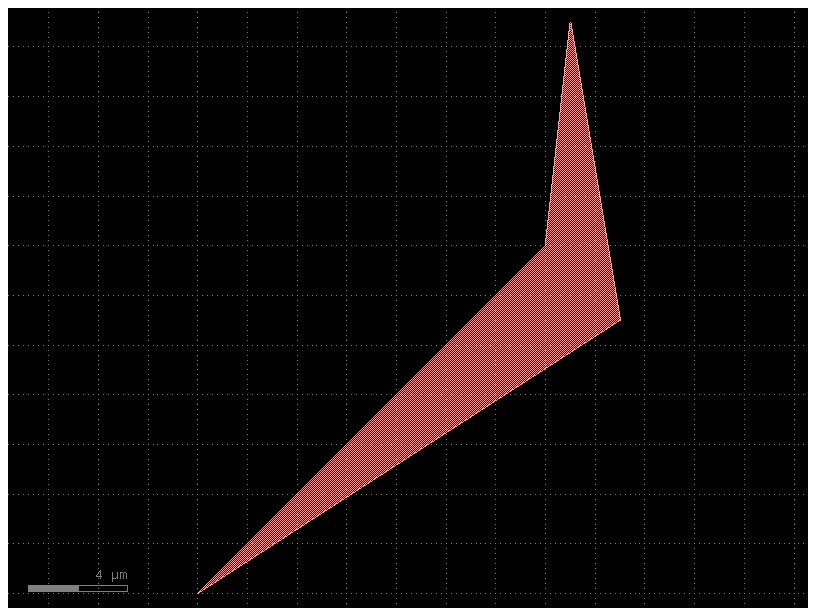

In [1]:
import gdsfactory as gf

c = (
    gf.Component()
)  # Create a blank component (essentially an empty GDS cell with some special features)
p1 = c.add_polygon([(-8, -6), (6, 8), (7, 17), (9, 5)], layer=(1, 0))
c.write_gds("demo.gds")  # write it to a GDS file. You can open it in klayout.
c.show()  # show it in klayout
c.plot()  # plot it in jupyter notebook

In [2]:
import gdsfactory as gf
from gdsfactory.component import Component
from gdsfactory.port import Port

2024-09-24 12:20:02.226 | INFO     | kfactory.kcell:show:8329 - klive v0.3.2: Opened file 'c:\Users\JUAN\PICUPVMASTER_juanferv\build\gds\3820693039.oas'
2024-09-24 12:20:02.226 | WARNING  | kfactory.kcell:show:8351 - klive is out of date. Installed:0.3.2/Recommended:0.3.3. Please update it in KLayout
2024-09-24 12:24:00.592 | INFO     | kfactory.kcell:show:8329 - klive v0.3.2: Opened file 'c:\Users\JUAN\PICUPVMASTER_juanferv\build\gds\2872203883.oas'
2024-09-24 12:24:00.598 | WARNING  | kfactory.kcell:show:8351 - klive is out of date. Installed:0.3.2/Recommended:0.3.3. Please update it in KLayout
2024-09-24 12:36:11.582 | INFO     | kfactory.kcell:show:8329 - klive v0.3.2: Opened file 'c:\Users\JUAN\PICUPVMASTER_juanferv\build\gds\1400546133.oas'
2024-09-24 12:36:11.582 | WARNING  | kfactory.kcell:show:8351 - klive is out of date. Installed:0.3.2/Recommended:0.3.3. Please update it in KLayout
2024-09-24 12:36:17.108 | INFO     | kfactory.kcell:show:8329 - klive v0.3.2: Opened file 'c:\

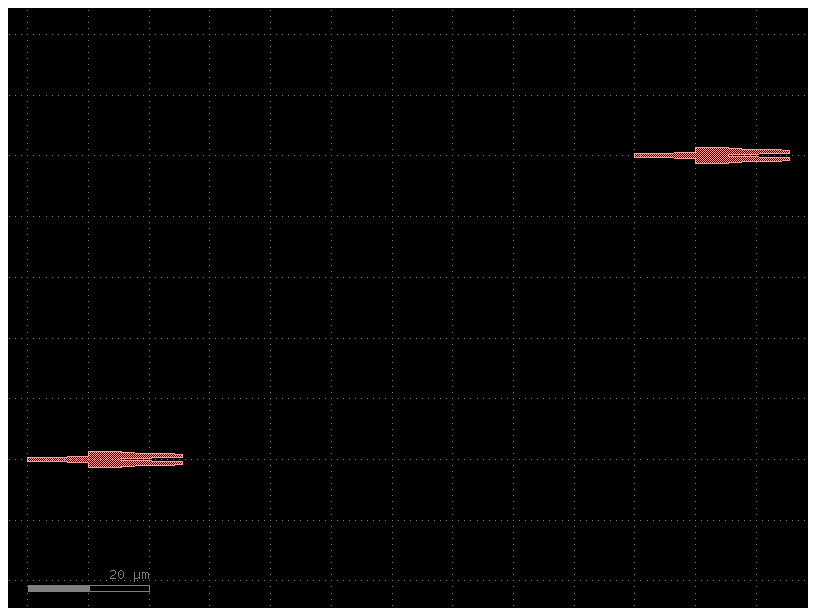

In [4]:
c = gf.Component()
mmi1 = c << gf.components.mmi1x2()
mmi2 = c << gf.components.mmi1x2()
mmi2.dmove((100, 50))
c.show()
c

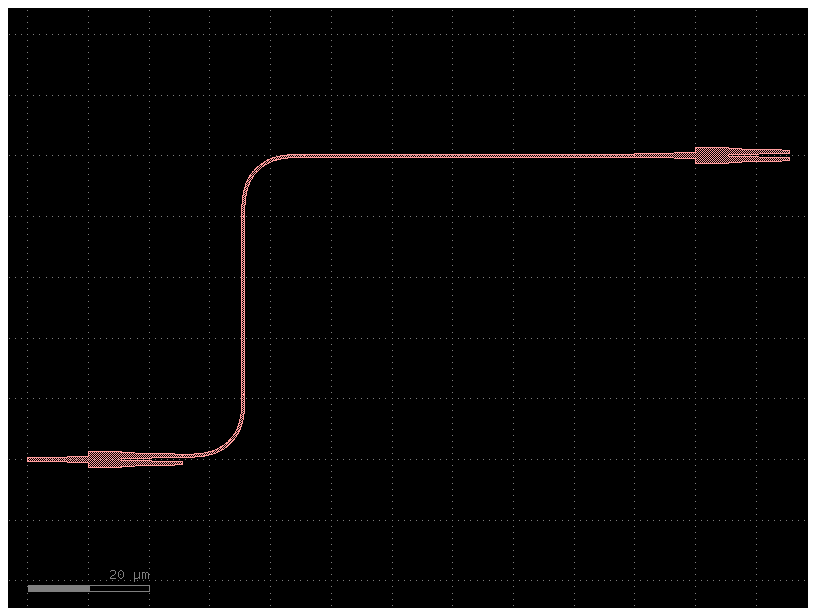

In [5]:
c = gf.Component()
mmi1 = c << gf.components.mmi1x2()
mmi2 = c << gf.components.mmi1x2()
mmi2.dmove((100, 50))
route = gf.routing.route_single(c, port1=mmi1.ports["o2"], port2=mmi2.ports["o1"])
c.show()
c

In [6]:
import json
import logging
import os
import sys
from functools import partial

import gdsfactory as gf
import jax
import jax.example_libraries.optimizers as opt
import jax.numpy as jnp
import matplotlib.pyplot as plt
import meow as mw
import numpy as np
import sax
from gdsfactory.generic_tech import get_generic_pdk
from numpy.fft import fft2, fftfreq, fftshift, ifft2
from rich.logging import RichHandler
from scipy import constants
from sklearn.linear_model import LinearRegression
from tqdm.notebook import trange, tqdm

import gplugins.sax as gs
import gplugins.tidy3d as gt
from gplugins.common.config import PATH

gf.config.rich_output()
PDK = get_generic_pdk()
PDK.activate()

logger = logging.getLogger()
logger.removeHandler(sys.stderr)
logging.basicConfig(level="WARNING", datefmt="[%X]", handlers=[RichHandler()])

In [1]:
import itertools
import json
import os
import sys
from functools import partial
from typing import List

import gdsfactory as gf  # conda install gdsfactory
import jax
import jax.example_libraries.optimizers as opt
import jax.numpy as jnp
import matplotlib.pyplot as plt
import meow as mw
import numpy as np
import sax
from numpy.fft import fft2, fftfreq, fftshift, ifft2
from tqdm.notebook import tqdm, trange

2024-09-24 12:53:49.237 | WARNING  | kfactory.conf:_validate_layout_cache:254 - 'cell_layout_cache' has been set to True. This might cause when as any cell names generated automatically are loaded from the layout instead of created. This could happen e.g. after reading a gds file into the layout.


In [14]:
def simple_mzi_mine( 
        length_y: float = 2.0,
        ):
    c = gf.Component()

    # components
    mmi_in = gf.components.mmi2x2()
    mmi_out = gf.components.mmi2x2()
    mmi_out2 = gf.components.mmi2x2()
    bend = gf.components.bend_euler()
    half_delay_straight = gf.components.straight(length=length_y)
    half_delay_straight2 = gf.components.straight(length=2*length_y)
    # references
    mmi_in = c.add_ref(mmi_in, name="mmi_in")
    mmi_out = c.add_ref(mmi_out, name="mmi_out")
    mmi_out2 = c.add_ref(mmi_out2, name="mmi_out")
    straight_top1 = c.add_ref(half_delay_straight, name="straight_top1")
    straight_top2 = c.add_ref(half_delay_straight, name="straight_top2")
    straight_bot11 = c.add_ref(half_delay_straight2, name="straight_top11")
    straight_bot21 = c.add_ref(half_delay_straight2, name="straight_top21")
    bend_top1 = c.add_ref(bend, name="bend_top1")
    bend_top2 = c.add_ref(bend, name="bend_top2").dmirror()
    bend_top3 = c.add_ref(bend, name="bend_top3").dmirror()
    bend_top4 = c.add_ref(bend, name="bend_top4")
    bend_btm1 = c.add_ref(bend, name="bend_btm1").dmirror()
    bend_btm2 = c.add_ref(bend, name="bend_btm2")
    bend_btm3 = c.add_ref(bend, name="bend_btm3")
    bend_btm4 = c.add_ref(bend, name="bend_btm4").dmirror()
    bend_top11 = c.add_ref(bend, name="bend_top11")
    bend_top21 = c.add_ref(bend, name="bend_top21").dmirror()
    bend_top31 = c.add_ref(bend, name="bend_top31").dmirror()
    bend_top41 = c.add_ref(bend, name="bend_top41")
    bend_btm11 = c.add_ref(bend, name="bend_btm1").dmirror()
    bend_btm21 = c.add_ref(bend, name="bend_btm21")
    bend_btm31 = c.add_ref(bend, name="bend_btm31")
    bend_btm41 = c.add_ref(bend, name="bend_btm41").dmirror()
    # connections
    bend_top1.connect("o1", mmi_in.ports["o3"])
    straight_top1.connect("o1", bend_top1.ports["o2"])
    bend_top2.connect("o1", straight_top1.ports["o2"])
    bend_top3.connect("o1", bend_top2.ports["o2"])
    straight_top2.connect("o1", bend_top3.ports["o2"])
    bend_top4.connect("o1", straight_top2.ports["o2"])

    bend_btm1.connect("o1", mmi_in.ports["o4"])
    bend_btm2.connect("o1", bend_btm1.ports["o2"])
    bend_btm3.connect("o1", bend_btm2.ports["o2"])
    bend_btm4.connect("o1", bend_btm3.ports["o2"])

    mmi_out.connect("o1", bend_btm4.ports["o2"])

    bend_top11.connect("o1", mmi_out.ports["o3"])
    bend_top21.connect("o1", bend_top11.ports["o2"])
    bend_top31.connect("o1", bend_top21.ports["o2"])
    bend_top41.connect("o1", bend_top31.ports["o2"])

    bend_btm11.connect("o1", mmi_out.ports["o4"])
    straight_bot11.connect("o1", bend_btm11.ports["o2"])
    bend_btm21.connect("o1", straight_bot11.ports["o2"])
    bend_btm31.connect("o1", bend_btm21.ports["o2"])
    straight_bot21.connect("o1", bend_btm31.ports["o2"])
    bend_btm41.connect("o1", straight_bot21.ports["o2"])

    mmi_out2.connect("o1", bend_btm41.ports["o2"])
    # ports
    c.add_port("o1", port=mmi_in.ports["o1"])
    c.add_port("o2", port=mmi_in.ports["o2"])
    c.add_port("o3", port=mmi_out2.ports["o3"])
    c.add_port("o4", port=mmi_out2.ports["o4"])
    return c

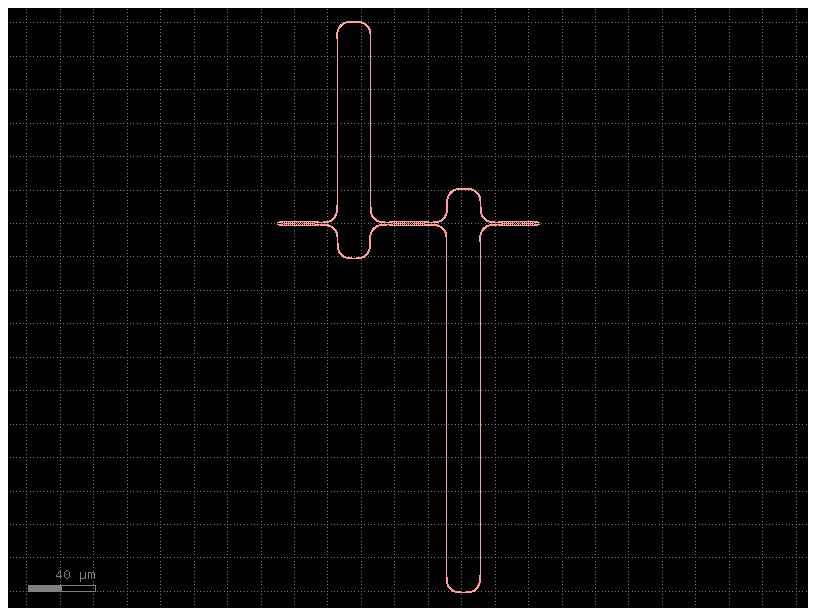

In [19]:
mzi = simple_mzi_mine(length_y=100.0)
mzi.show()

mzi


In [20]:
def mmi2x2_5050():
    S = {
        ("o1", "o3"): 0.5**0.5,
        ("o1", "o4"): 1j * 0.5**0.5,
        ("o2", "o3"): 1j * 0.5**0.5,
        ("o2", "o4"): 0.5**0.5,
    }
    return sax.reciprocal(S)

In [23]:
def mmi2x2_7129():
    S = {
        ("o1", "o3"): 0.71**0.5,
        ("o1", "o4"): 1j * 0.29**0.5,
        ("o2", "o3"): 1j * 0.29**0.5,
        ("o2", "o4"): 0.71**0.5,
    }
    return sax.reciprocal(S)

In [24]:
def mmi2x2_9208():
    S = {
        ("o1", "o3"): 0.92**0.5,
        ("o1", "o4"): 1j * 0.08**0.5,
        ("o2", "o3"): 1j * 0.08**0.5,
        ("o2", "o4"): 0.92**0.5,
    }
    return sax.reciprocal(S)

In [25]:
def straight(length=10.0, width=0.5):
    S = {("o1", "o2"): 1.0}  # we'll improve this model later!
    return sax.reciprocal(S)

In [26]:
def bend_euler(length=10.0, width=0.5, dy=10.0, radius_min=7, radius=10):
    return straight(length=length, width=width)  # stub with straight for now

In [27]:
mzi.get_netlist(recursive=True)

{'orientation_mismatch': [{'message': 'bend_btm1,o1 and bend_btm1,o1 are '
                                      'misaligned by 180.0 deg',
                           'ports': ('bend_btm1,o1', 'bend_btm1,o1'),
                           'values': (180, 180)}]}


c:\ProgramData\miniforge-pypy3\envs\PICUPVMASTER_juanferv\Lib\site-packages\gdsfactory\get_netlist.py:356: UserWarning: Found multiple connections at (121000, -625):['mmi_out,o1', 'mmi_out,o1', 'bend_btm41,o2']
  warn(f"Found multiple connections at {xy}:{ports_at_xy}")
c:\ProgramData\miniforge-pypy3\envs\PICUPVMASTER_juanferv\Lib\site-packages\gdsfactory\get_netlist.py:356: UserWarning: Found multiple connections at (121000, 625):['mmi_out,o2', 'mmi_out,o2', 'bend_top41,o2']
  warn(f"Found multiple connections at {xy}:{ports_at_xy}")
c:\ProgramData\miniforge-pypy3\envs\PICUPVMASTER_juanferv\Lib\site-packages\gdsfactory\get_netlist.py:356: UserWarning: Found multiple connections at (146500, 625):['mmi_out,o3', 'mmi_out,o3', 'o3']
  warn(f"Found multiple connections at {xy}:{ports_at_xy}")
c:\ProgramData\miniforge-pypy3\envs\PICUPVMASTER_juanferv\Lib\site-packages\gdsfactory\get_netlist.py:356: UserWarning: Found multiple connections at (146500, -625):['mmi_out,o4', 'mmi_out,o4', 'o4']


{'Unnamed_17': {'nets': ({'p1': 'bend_btm1,o1', 'p2': 'bend_btm1,o1'},
   {'p1': 'bend_btm2,o2', 'p2': 'bend_btm3,o1'},
   {'p1': 'bend_btm21,o1', 'p2': 'straight_top11,o2'},
   {'p1': 'bend_btm21,o2', 'p2': 'bend_btm31,o1'},
   {'p1': 'bend_btm3,o2', 'p2': 'bend_btm4,o1'},
   {'p1': 'bend_btm31,o2', 'p2': 'straight_top21,o1'},
   {'p1': 'bend_btm41,o1', 'p2': 'straight_top21,o2'},
   {'p1': 'bend_top1,o1', 'p2': 'mmi_in,o3'},
   {'p1': 'bend_top1,o2', 'p2': 'straight_top1,o1'},
   {'p1': 'bend_top11,o2', 'p2': 'bend_top21,o1'},
   {'p1': 'bend_top2,o1', 'p2': 'straight_top1,o2'},
   {'p1': 'bend_top2,o2', 'p2': 'bend_top3,o1'},
   {'p1': 'bend_top21,o2', 'p2': 'bend_top31,o1'},
   {'p1': 'bend_top3,o2', 'p2': 'straight_top2,o1'},
   {'p1': 'bend_top31,o2', 'p2': 'bend_top41,o1'},
   {'p1': 'bend_top4,o1', 'p2': 'straight_top2,o2'}),
  'instances': {'bend_btm1': {'component': 'bend_euler',
    'info': {'length': 16.637,
     'dy': 10,
     'min_bend_radius': 7.061,
     'radius': 10,
 

In [ ]:
models = {
    "mmi1x2": mmi1x2,
    "mmi2x2": mmi2x2_5050,
    "straight": straight,
    "bend_euler": bend_euler,
}
mzi1, _ = sax.circuit(mzi.get_netlist(recursive=True), models=models)
?mzi1